In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

## Import processed data

In [3]:
folder_processed_data_path = './data/processed_data/'

movie_df = pd.read_csv(os.path.join(folder_processed_data_path, 'movie_df.csv'))
movie_df.set_index(['wiki_ID'], inplace=True)
# Verify the indexes are unique
print(f"Is the indexing unique in movie_df ? {movie_df.index.is_unique}")

character_df = pd.read_csv(os.path.join(folder_processed_data_path, 'character_df.csv'))
character_df.set_index(['wiki_ID', 'char_name'], inplace=True)
# Verify the indexes are unique
print(f"Is the indexing unique in character_df ? {character_df.index.is_unique}")

name_by_movie_df = pd.read_csv(os.path.join(folder_processed_data_path, 'name_by_movie_df.csv'))
name_by_movie_df.set_index(['wiki_ID', 'char_words'], inplace=True)
# Verify the indexes are unique
print(f"Is the indexing unique in name_by_movie_df ? {name_by_movie_df.index.is_unique}")

baby_name_df = pd.read_csv(os.path.join(folder_processed_data_path, 'baby_name_df.csv'))
baby_name_df.set_index(['name', 'year'], inplace=True)
# Verify the indexes are unique
print(f"Is the indexing unique in baby_name_df ? {baby_name_df.index.is_unique}")

movies_to_imdb_id_df = pd.read_csv(os.path.join(folder_processed_data_path, 'movies_to_imdb_id.csv'))
# Verify the indexes are unique
print(f"Is the indexing unique in movies_to_imdb_id_df ? {movies_to_imdb_id_df.index.is_unique}")

rating_df = pd.read_csv(os.path.join(folder_processed_data_path, 'rating_df.csv'))
# Verify the indexes are unique
print(f"Is the indexing unique in rating_df ? {rating_df.index.is_unique}")

print("movie_df :")
display(movie_df.head())
print("character_df :")
display(character_df.head())
print("name_by_movie_df :")
display(name_by_movie_df.head())
print("baby_name_df :")
display(baby_name_df.head())
print("movies_to_imdb_id_df :")
display(movies_to_imdb_id_df.head())
print("rating_df :")
display(rating_df.head())

Is the indexing unique in movie_df ? True
Is the indexing unique in character_df ? True
Is the indexing unique in name_by_movie_df ? True
Is the indexing unique in baby_name_df ? True
Is the indexing unique in movies_to_imdb_id_df ? True
Is the indexing unique in rating_df ? True
movie_df :


,free_ID,mov_name,release,revenue,runtime,languages,countries,genres
wiki_ID,,,,,,,,
975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


character_df :


DOB gender  height  \
wiki_ID char_name                                               
975900  Akooshay                    1958-08-26      F   1.620   
        Lieutenant Melanie Ballard  1974-08-15      F   1.780   
        Desolation Williams         1969-06-15      M   1.727   
        Sgt Jericho Butler          1967-09-12      M   1.750   
        Bashira Kincaid             1977-09-25      F   1.650   

                                              act_name  age_at_release  
wiki_ID char_name                                                       
975900  Akooshay                        Wanda De Jesus            42.0  
        Lieutenant Melanie Ballard  Natasha Henstridge            27.0  
        Desolation Williams                   Ice Cube            32.0  
        Sgt Jericho Butler               Jason Statham            33.0  
        Bashira Kincaid                    Clea DuVall            23.0

name_by_movie_df :


,
wiki_ID,char_words
975900,Lieutenant
7668793,Lieutenant
24226493,Lieutenant
3388805,Lieutenant
8231713,Lieutenant


baby_name_df :


,,number,percentage
name,year,,
Aaban,2007,5,0.000125
Aadam,2007,8,0.000200
Aadan,2007,8,0.000200
Aadarsh,2007,13,0.000325
Aaden,2007,157,0.003928


movies_to_imdb_id_df :


,wikipedia_ID,IMDB_ID
0,77856,tt0058331
1,156558,tt0255819
2,171005,tt0097499
3,175024,tt0020823
4,175026,tt0021335


rating_df :


,tconst,averageRating,numVotes
0,tt0000001,5.7,2004
1,tt0000002,5.8,269
2,tt0000003,6.5,1904
3,tt0000004,5.5,178
4,tt0000005,6.2,2685


# Preprocessing

## Movie metadata : data convertion of release date

Lets compute the missing values and remove the NaN value in the release column

In [4]:
nb_release_missing = movie_df['release'].isna().sum()
total_movies = len(movie_df)
perc_missing = (nb_release_missing / total_movies)*100
print(f"Percentage of missing values in column 'release': {perc_missing:.2f}%")

Percentage of missing values in column 'release': 8.44%


In [5]:
print(f"Before removing NaN : len(movie_df) = {len(movie_df)}")
movie_df.dropna(subset=['release'], inplace=True)
print(f"After removing NaN : len(movie_df) = {len(movie_df)}")

Before removing NaN : len(movie_df) = 81741
After removing NaN : len(movie_df) = 74839


We should convert the release date of the movie_df dataframe into datetime object to be able to plot them

In [6]:
counts_lengths = movie_df['release'].apply(lambda x: len(str(x))).value_counts()
print(f"In the release column of movie_df the string have the following lengths with their frequency : \n\n{counts_lengths}")

In the release column of movie_df the string have the following lengths with their frequency : 

release
10    39373
4     32172
7      3294
Name: count, dtype: int64


In [7]:
length4_test = movie_df[movie_df['release'].apply(lambda x: len(str(x)) == 4)].iloc[0]['release']
print(f"example of a value of length 4: {length4_test}")
length7_test = movie_df[movie_df['release'].apply(lambda x: len(str(x)) == 7)].iloc[0]['release']
print(f"example of a value of length 7: {length7_test}")
length10_test = movie_df[movie_df['release'].apply(lambda x: len(str(x)) == 10)].iloc[0]['release']
print(f"example of a value of length 10: {length10_test}")

example of a value of length 4: 1988
example of a value of length 7: 2003-10
example of a value of length 10: 2001-08-24


In [8]:
# def convert_to_datetime(date_str):
#     if isinstance(date_str, str):
#         if len(date_str) == 4:
#             try:
#                 return pd.to_datetime(date_str, format='%Y')
#             except:
#                 print("exception!")
#                 return pd.NaT
#         if len(date_str) == 7:
#             try:
#                 return pd.to_datetime(date_str, format='%Y-%m')
#             except:
#                 print("exception!")
#                 return pd.NaT
#         if len(date_str) == 10:
#             try:
#                 return pd.to_datetime(date_str, format='%Y-%m-%d')
#             except:
#                 print("exception!")
#                 return pd.NaT
#     else:
#         print("already done : no exception")
#         return date_str
        

In [11]:
movie_datetime_df = movie_df.copy(deep=True)
print(f"Before conversion : type of the column release in movie_df is : {type(movie_datetime_df['release'].iloc[0])}")

# movie_datetime_df['release'] = movie_df['release'].apply(convert_to_datetime)
movie_datetime_df['release'] = movie_df['release'].apply(lambda x: str(x)[:4]).astype(np.int64)

filtered_movie_datetime_df = movie_datetime_df.dropna(subset=['release']).copy(deep=True)
filtered_movie_datetime_df = filtered_movie_datetime_df[filtered_movie_datetime_df['release'] >= 1800]
print(f"Number of rows dropped due to NaN value as release attribut : {len(movie_datetime_df) - len(filtered_movie_datetime_df)}")

print(f"After conversion : type of the column release in movie_df is : {type(filtered_movie_datetime_df['release'].iloc[0])}")

Before conversion : type of the column release in movie_df is : <class 'str'>
Number of rows dropped due to NaN value as release attribut : 1
After conversion : type of the column release in movie_df is : <class 'numpy.int64'>


Check for NaT values

In [12]:
nb_nat_values = filtered_movie_datetime_df['release'].isna().sum()
print(nb_nat_values)

0


In [13]:
del movie_df
movie_df = filtered_movie_datetime_df

## Movie metadata : add rating by merging

Let's check if we have the rating of all the movies. To do so we carry out a left merge and count the number of missing values

In [14]:
left_merged_imdb_movie_df = pd.merge(movie_df.reset_index(), movies_to_imdb_id_df, left_on='wiki_ID', right_on='wikipedia_ID', how='left').copy(deep=True)
display(left_merged_imdb_movie_df.head(2))
print(f"length of the dataframe : {len(left_merged_imdb_movie_df)}")

,wiki_ID,free_ID,mov_name,release,revenue,runtime,languages,countries,genres,wikipedia_ID,IMDB_ID
0,975900,/m/03vyhn,Ghosts of Mars,2001,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",975900.0,tt0228333
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",3196793.0,tt0245916


length of the dataframe : 74838


In [15]:
nb_rating_missing = left_merged_imdb_movie_df['IMDB_ID'].isna().sum()
total_movies = len(left_merged_imdb_movie_df)
perc_missing = (nb_rating_missing / total_movies)*100
print(f"Percentage of missing values in column 'averageRating': {perc_missing:.2f}%")

Percentage of missing values in column 'averageRating': 5.05%


We miss about 5% of the IMDB index. Therefore, the number of movie is reduced of 5% as well. Let's make the inner merge to keep only the movie for which we know the rating

In [16]:
merged_imdb_movie_df = pd.merge(movie_df.reset_index(), movies_to_imdb_id_df, left_on='wiki_ID', right_on='wikipedia_ID', how='inner').copy(deep=True)
display(merged_imdb_movie_df.head(2))
print(f"length of the dataframe : {len(merged_imdb_movie_df)}")

,wiki_ID,free_ID,mov_name,release,revenue,runtime,languages,countries,genres,wikipedia_ID,IMDB_ID
0,975900,/m/03vyhn,Ghosts of Mars,2001,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",975900,tt0228333
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",3196793,tt0245916


length of the dataframe : 71062


In [17]:
merged_rating_movie_df = pd.merge(merged_imdb_movie_df, rating_df, left_on='IMDB_ID', right_on='tconst', how='inner').copy(deep=True)
display(merged_rating_movie_df.head(2))
print(f"length of the dataframe : {len(merged_rating_movie_df)}")

,wiki_ID,free_ID,mov_name,release,revenue,runtime,languages,countries,genres,wikipedia_ID,IMDB_ID,tconst,averageRating,numVotes
0,975900,/m/03vyhn,Ghosts of Mars,2001,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",975900,tt0228333,tt0228333,4.9,56880
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",3196793,tt0245916,tt0245916,6.0,69


length of the dataframe : 65501


Lets remove the columns that we don't need

In [18]:
movie_rating_df = merged_rating_movie_df.drop(['wikipedia_ID', 'IMDB_ID', 'tconst'], axis=1).copy(deep=True)
display(movie_rating_df.head(2))
print(f"length of the dataframe : {len(movie_rating_df)}")

,wiki_ID,free_ID,mov_name,release,revenue,runtime,languages,countries,genres,averageRating,numVotes
0,975900,/m/03vyhn,Ghosts of Mars,2001,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",4.9,56880
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",6.0,69


length of the dataframe : 65501


## Baby name : data conversion of year

In [20]:
# datetime_baby_name_df = baby_name_df.reset_index().copy(deep=True)
# display(datetime_baby_name_df.head(2))
# print(f"Before conversion : type of the column release in movie_df is : {type(datetime_baby_name_df['year'].iloc[0])}")

# datetime_baby_name_df['year'] = baby_name_df.reset_index()['year'].astype(str).apply(convert_to_datetime)

# # filtered_movie_datetime_df = movie_datetime_df.dropna(subset=['year']).copy(deep=True)
# # print(f"Number of rows dropped due to NaN value as release attribut : {len(movie_datetime_df) - len(filtered_movie_datetime_df)}")

# print(f"After conversion : type of the column release in movie_df is : {type(filtered_movie_datetime_df['year'].iloc[0])}")

## Visualisation for a specific name

Let's chose a name and visualize the variation of the baby names in times

In [26]:
chosen_name = "Rose"

filt_name_by_movie_df = name_by_movie_df.query("char_words == @chosen_name").copy(deep=True)
filt_name_by_movie_df.reset_index(inplace=True)
filt_name_by_movie_df.drop('char_words', axis=1, inplace=True)
display(filt_name_by_movie_df)
print(f"There are {len(filt_name_by_movie_df)} movies with a character named {chosen_name}.")

,wiki_ID
0,967367
1,32635381
2,256337
3,31351
4,10466696
...,...
225,10193848
226,164502
227,24245276
228,265242


There are 230 movies with a character named Rose.


In [27]:
filt_movie_rating_df = pd.merge(movie_rating_df, filt_name_by_movie_df, on='wiki_ID', how='inner').copy(deep=True)
display(filt_movie_rating_df)

,wiki_ID,free_ID,mov_name,release,revenue,runtime,languages,countries,genres,averageRating,numVotes
0,25960460,/m/0b6kc_5,Daddy and Them,2001,NaN,101.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/0vgkd"": ""Black comedy"", ""/m/01z4y"": ""Come...",5.6,2510
1,967367,/m/03v5s9,Hustle,2004,NaN,90.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01z02hx"": ""Sports"", ""/m/03bxz7"": ""Biograp...",4.7,457
2,32635381,/m/0h3lw_c,Red Dog,2011,NaN,92.0,"{""/m/02h40lc"": ""English Language""}","{""/m/0chghy"": ""Australia""}","{""/m/0hqxf"": ""Family Film"", ""/m/07s9rl0"": ""Dra...",7.3,18987
3,256337,/m/01l_pn,Charlie's Angels: Full Throttle,2003,259175788.0,105.0,"{""/m/0653m"": ""Standard Mandarin"", ""/m/02h40lc""...","{""/m/09c7w0"": ""United States of America""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/03k9fj"": ""Ad...",4.9,131585
4,31176974,/m/0gh8948,My Future Boyfriend,2011,NaN,73.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/06n90"": ""S...",5.4,2405
...,...,...,...,...,...,...,...,...,...,...,...
219,35572558,/m/0jkypf1,Laurence Anyways,2012,NaN,159.0,"{""/m/064_8sq"": ""French Language""}","{""/m/0f8l9c"": ""France"", ""/m/0d060g"": ""Canada""}","{""/m/02l7c8"": ""Romance Film"", ""/m/07s9rl0"": ""D...",7.6,21765
220,34086866,/m/0hr6d1j,Pitch Perfect,2012,46226459.0,NaN,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/04rlf"": ""Music"", ""/m/04t36"": ""Musical"", ""...",7.1,323856
221,74942,/m/0jy_1,Meet Me in St. Louis,1944,NaN,108.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/09n5t_"": ""Americana"", ""/m/04t36"": ""Musica...",7.5,26255
222,1188393,/m/04fqmy,Title to Murder,2001,NaN,102.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/01jfsb"": ""...",5.8,26


There are too many movies. Lets keep only the 10 most famous ones.

In [28]:
sorted_filt_movie_rating_df = filt_movie_rating_df.sort_values(by='numVotes', ascending=False).copy(deep=True)

filt_movie_rating_df = sorted_filt_movie_rating_df.head(10).copy(deep=True)
display(filt_movie_rating_df)

,wiki_ID,free_ID,mov_name,release,revenue,runtime,languages,countries,genres,averageRating,numVotes
62,52371,/m/0dr_4,Titanic,1997,2.185372e+09,194.0,"{""/m/02bjrlw"": ""Italian Language"", ""/m/02h40lc...","{""/m/09c7w0"": ""United States of America""}","{""/m/0fx2s"": ""Tragedy"", ""/m/04xvh5"": ""Costume ...",7.9,1251878
84,31941988,/m/0gvsynb,Harry Potter and the Deathly Hallows – Part 2,2011,1.328111e+09,130.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/07s9rl0"": ""Drama"", ""/m/02n4kr"": ""Mystery""...",8.1,922727
101,57820,/m/0fvr1,Donnie Darko,2001,4.116307e+06,112.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",8.0,833937
31,30273553,/m/0g4vmj8,Drive,2011,7.617517e+07,100.0,"{""/m/02h40lc"": ""English Language"", ""/m/0t_2"": ...","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/0lsxr"": ""Crime F...",7.8,685894
95,8031432,/m/026p4q7,The Curious Case of Benjamin Button,2008,3.339321e+08,166.0,"{""/m/064_8sq"": ""French Language"", ""/m/06b_j"": ...","{""/m/09c7w0"": ""United States of America""}","{""/m/068d7h"": ""Romantic drama"", ""/m/060__y"": ""...",7.8,680855
220,34086866,/m/0hr6d1j,Pitch Perfect,2012,4.622646e+07,NaN,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/04rlf"": ""Music"", ""/m/04t36"": ""Musical"", ""...",7.1,323856
19,231829,/m/01hqhm,Magnolia,1999,4.845180e+07,189.0,"{""/m/064_8sq"": ""French Language"", ""/m/02h40lc""...","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}",8.0,323792
159,4867859,/m/0crrc8,How the Grinch Stole Christmas!,2000,3.451414e+08,105.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/0hqxf"": ""Family Film"", ""/m/01hmnh"": ""Fant...",6.3,273236
65,2465576,/m/07f_7h,Silent Hill,2006,9.760745e+07,124.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/0gw5n2f"": ""Japanese Movies"", ""/m/0hj3n4p""...",6.5,239906
91,129619,/m/0y_pg,Ghost,1990,5.057026e+08,128.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/0fdjb"": ""Superna...",7.1,230124


In [29]:
# Get the release dates
release_serie = filt_movie_rating_df['release']
display(release_serie)

62     1997
84     2011
101    2001
31     2011
95     2008
220    2012
19     1999
159    2000
65     2006
91     1990
Name: release, dtype: int64

,year,percentage
55,1880,0.350896
56,1881,0.380923
57,1882,0.399940
58,1883,0.406555
59,1884,0.437442
...,...,...
10,2018,0.069851
11,2019,0.072941
13,2020,0.071416
14,2021,0.070716


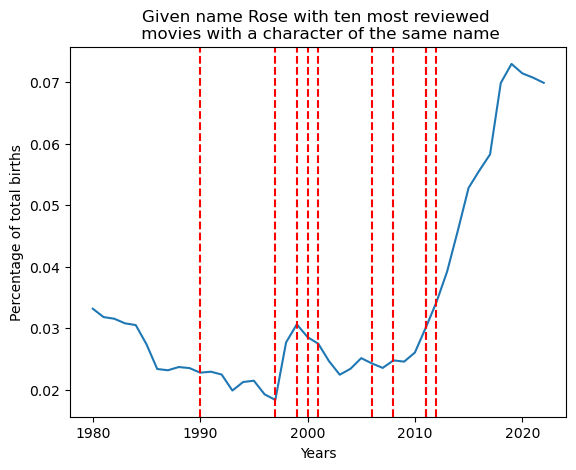

In [38]:
percentage_df = baby_name_df.loc[chosen_name]['percentage'].to_frame().reset_index()
percentage_df.sort_values(by=['year'], ascending=True, inplace=True)
display(percentage_df)

# plot limits
x_lim_min = 1980
x_lim_max = 2023

x_values = percentage_df.query("year >= @x_lim_min")['year'].values
# print(f"x_values = {x_values}")
# print(f"len(x_values) = {len(x_values)}")
y_values = percentage_df.query("year >= @x_lim_min")['percentage'].values
# print(f"y_values = {y_values}")
# print(f"len(y_values) = {len(y_values)}")

# Create a scatter plot
plt.plot(x_values, y_values)
plt.xlabel('Years')
plt.ylabel('Percentage of total births')
plt.title(f'Given name {chosen_name} with ten most reviewed \n movies with a character of the same name')

# Draw vertical lines for each movie release
vertical_lines_series = release_serie.values
# print(vertical_lines_series)
for x_value in vertical_lines_series:
    plt.axvline(x=x_value, color='r', linestyle='--', label=f'x={x_value}')

plt.show()

In [ ]:
filt_movie_rating_df['release'].info()

In [ ]:
baby_name_df.loc[chosen_name]['percentage']